# **Preparación del entorno**

- [**Keras**](https://keras.io/): API.
- [**TensorFlow**](https://www.tensorflow.org/): Backend.
- [**WSL**](https://learn.microsoft.com/en-us/windows/wsl/): Máquina virtual.
- [**NVIDIA CUDA en WSL**](https://learn.microsoft.com/en-us/windows/ai/directml/gpu-cuda-in-wsl): Aceleración por GPU.
- [**TensorFlow y CUDA**](https://www.tensorflow.org/install/pip#windows-wsl2_1).

In [3]:
# ! pip install tensorflow
# ! pip install tensorflow[and-cuda]  # Para NVIDIA CUDA

In [4]:
# Verificar configuración de GPU
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Configuración de directorios
base_dir = 'Dataset IA 2024-1'
d1_train_dir = f'{base_dir}/D1'
d2_train_dir = f'{base_dir}/D2'
test_dir = f'{base_dir}/T'

# **Diseño e implementación de CNN**

In [6]:
import keras

# Función para crear el modelo de red neuronal convolucional (CNN)
def create_model():
    model = keras.Sequential()  # Modelo secuencial
    model.add(keras.Input(shape=(150, 150, 3))) # Imágenes de 150x150 píxeles con 3 canales de color (RGB)

    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))    # 32 filtros de 3x3 con función de activación ReLU
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))          # Capa de pooling de 2x2 para reducir la dimensionalidad de la imagen

    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))    # 64 filtros de 3x3 con función de activación ReLU
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))          # Capa de pooling de 2x2 para reducir la dimensionalidad de la imagen

    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))   # 128 filtros de 3x3 con función de activación ReLU
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))          # Capa de pooling de 2x2 para reducir la dimensionalidad de la imagen

    model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))   # 256 filtros de 3x3 con función de activación ReLU
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))          # Capa de pooling de 2x2 para reducir la dimensionalidad de la imagen

    model.add(keras.layers.Flatten())   # Capa de aplanado de la imagen para convertirla en un vector unidimensional
    model.add(keras.layers.Dense(6, activation='softmax'))  # Capa densa de 6 neuronas con función de activación Softmax para clasificación multiclase (6 clases)

    model.summary() # Resumen del modelo de red neuronal

    # Compilación del modelo con optimizador Adam, función de pérdida de entropía cruzada categórica y métrica de precisión
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# **Entrenamiento de la red y prueba de modelos con conjunto T**

In [7]:
# Función para cargar dataset de imágenes
def dataset(directory, shuffle):
    train_dataset = keras.utils.image_dataset_from_directory(
        directory,                  # Directorio de las imágenes
        labels='inferred',          # Las labels son inferidas de los nombres de los subdirectorios
        label_mode='categorical',   # Las labels son codificadas en formato one-hot
        image_size=(150, 150),      # Tamaño de las imágenes
        batch_size=128,             # Tamaño de los batches de imágenes
        shuffle=shuffle             # Mezclar las imágenes aleatoriamente
    )
    return train_dataset

In [8]:
# Función para entrenar modelo
def train_model(directory, saved_name):
    model = create_model()                      # Crear modelo de red neuronal
    train_dataset = dataset(directory, True)    # Cargar dataset de entrenamiento con mezcla aleatoria de imágenes
    model.fit(train_dataset, epochs=25)         # Entrenar modelo con 25 epochs
    model.save(saved_name)                      # Guardar modelo entrenado

    return model

In [9]:
test_dataset = dataset(test_dir, False) # Cargar dataset de prueba sin mezcla aleatoria de imágenes

# Función para evaluar modelo con dataset de prueba
def test_model(model):
    loss, accuracy = model.evaluate(test_dataset)   # Evaluar modelo con dataset de prueba
    print('Loss:', loss)                            # Imprimir pérdida de entropía cruzada categórica
    print('Accuracy:', accuracy)                    # Imprimir precisión del modelo

Found 856 files belonging to 6 classes.


2024-06-29 21:55:15.019963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-29 21:55:15.020024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-29 21:55:15.020050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-29 21:55:15.201676: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-29 21:55:15.201729: I external/local_xla/xla/stream_executor

## **Entrenamiento con dataset D1**

In [10]:
model = train_model(d1_train_dir, 'trained_model_d1.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        75,270 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,686 (1.77 MB)

 Trainable params: 463,686 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Found 2099 files belonging to 6 classes.
Epoch 1/25


I0000 00:00:1719712517.125597  455886 service.cc:145] XLA service 0x7fed40004af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719712517.125644  455886 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-06-29 21:55:17.150739: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-29 21:55:17.246634: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 2/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1484 - loss: 22.5036

I0000 00:00:1719712524.149328  455886 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.1660 - loss: 37.0133
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3918 - loss: 1.4924
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6110 - loss: 1.0523
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6492 - loss: 0.9345
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6907 - loss: 0.8587
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7404 - loss: 0.7386
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7769 - loss: 0.6294
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8299 - loss: 0.4910
Epoch 9/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8325 - loss: 0.4979
Epoch 10/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8597 - loss: 0.4226
Epoch 11/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9011 - loss: 0.3294
Epoch 12/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9198 

## **Prueba con dataset D1**

In [11]:
test_model(model)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.7800 - loss: 1.1924
Loss: 1.4447616338729858
Accuracy: 0.7383177280426025


## **Entrenamiento con dataset D2**

In [12]:
model = train_model(d2_train_dir, 'trained_model_d2.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │        75,270 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,686 (1.77 MB)

 Trainable params: 463,686 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Found 2100 files belonging to 6 classes.
Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.2474 - loss: 43.0130
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4550 - loss: 1.4902
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5932 - loss: 1.1082
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6493 - loss: 0.9394
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6834 - loss: 0.8490
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7401 - loss: 0.7348
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7319 - loss: 0.7659
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7672 - loss: 0.6408
Epoch 9/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7781 - loss: 0.6177
Epoch 10/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7930 - loss: 0.5693
Epoch 11/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8438 - loss: 0.4458
Epoch 12/25
17/17 ━━

## **Prueba con dataset D2**

In [13]:
test_model(model)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5939 - loss: 1.6627
Loss: 2.0536561012268066
Accuracy: 0.5502336621284485


# **Clasificación visual de una imagen**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicciones del modelo D1:
- Bosque: 0.00%
- Calle: 0.22%
- Edificación: 0.01%
- Glaciar: 0.13%
- Mar: 86.29%
- Montaña: 13.36%


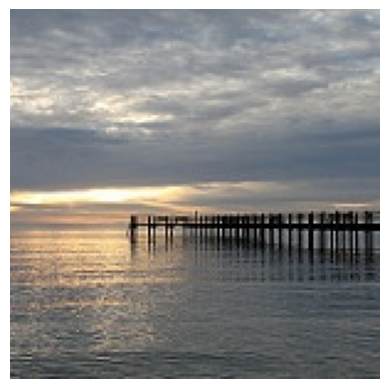

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicciones del modelo D2:
- Bosque: 0.00%
- Calle: 17.42%
- Edificación: 4.00%
- Glaciar: 2.26%
- Mar: 0.86%
- Montaña: 75.46%


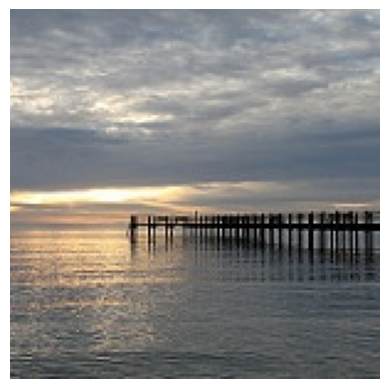

In [35]:
import matplotlib.pyplot as plt

# Cargar modelos
model_d1 = keras.models.load_model('trained_model_d1.keras')    # Cargar modelo entrenado D1
model_d2 = keras.models.load_model('trained_model_d2.keras')    # Cargar modelo entrenado D2

# Función para hacer predicciones con una imagen
def predict_image(model, image_path, model_number):
    img = keras.utils.load_img(image_path, target_size=(150, 150))  # Cargar imagen y redimensionarla a 150x150 píxeles
    plt.imshow(img) # Mostrar imagen
    
    img_array = keras.utils.img_to_array(img)               # Convertir imagen a un array
    img_array = keras.ops.expand_dims(img_array, axis=0)    # Añadir una dimensión extra al array para que coincida con el formato de entrada del modelo

    predictions = model.predict(img_array)  # Hacer predicciones con el modelo
    
    categories = ['Bosque', 'Calle', 'Edificación', 'Glaciar', 'Mar', 'Montaña']    # Categorías de clasificación de las imágenes
    print(f"Predicciones del modelo D{model_number}:")
    for i, score in enumerate(predictions[0]):  # Iterar sobre las predicciones y sus scores de probabilidad de pertenencia a cada categoría
        print(f"- {categories[i]}: {100 * score:.2f}%")
    
    plt.axis('off')
    plt.show()
    return predictions

# image_path = f'{test_dir}/edificacion/20061.jpg'
image_path = f'{test_dir}/mar/20236.jpg'

# Hacer predicciones con ambos modelos
predictions_d1 = predict_image(model_d1, image_path, 1)
predictions_d2 = predict_image(model_d2, image_path, 2)

# **Referencias**

- keras-team. (2024). Keras. Obtenido de https://keras.io/about/

- Zhou, V. (2019). Keras for Beginners: Implementing a Convolutional Neural Network. Obtenido de https://victorzhou.com/blog/keras-cnn-tutorial/

- Banerjee, P. (2020). Comprehensive Guide to CNN with Keras. Obtenido de https://www.kaggle.com/code/prashant111/comprehensive-guide-to-cnn-with-keras

- Fchollet. (2020). Image classification from scratch. Obtenido de https://keras.io/examples/vision/image_classification_from_scratch/

- Kumar, R. (2024). Building and Using a Convolutional Neural Network (CNN) for Image Classification with Keras and TensorFlow. Obtenido de https://rohan09.medium.com/building-and-using-a-convolutional-neural-network-cnn-for-image-classification-with-keras-and-7abf571f0abb